<a href="https://colab.research.google.com/github/cswcjt/Dacon-Oil/blob/main/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image
import os
import pandas as pd
base_path = '/Users/jtchoi/Library/CloudStorage/GoogleDrive-jungtaek0227@gmail.com/My Drive/fastcamp/datas/open/pic/'
#%pwd
#%ls

## 1조: 오일머니
## 참여 대회: 데이콘 건설기계 오일 상태 분류 AI 경진대회

### - 목차

#### 1) Understanding Data Set 
    - Competition Rule
    - Train columns and Test columns
    - Data Infos
    
#### 2) Model selection 
    - RF, XGB, LBGM: classification and regressor
    
#### 3) Insight from EDA 
    - Imblanace Problem
    - Correlation
    
#### 4) Preprocessing
    - Fill/Drop Null data
    - Standard Scaling
    - Ordinal Encoding
    
#### 5) Feature Engineering 
    5.1) Test to Train 
    - Multicollinearity
    - Regression Analysis for Feature Creation  
    
    5.2) Train to Classification
    - Group
    - Sampling
    - Feature Importance 
    
#### 6) Classification 
    - RF, XGB, LBGM 
    
#### 7) Deep Learning
    - pytorch
    - Teacher & Student model
    

### 1. 데이터 이해

#### 1) 대회 규정: 외부 데이터 사용 가능하지만 테스트시에는 사용 제한 

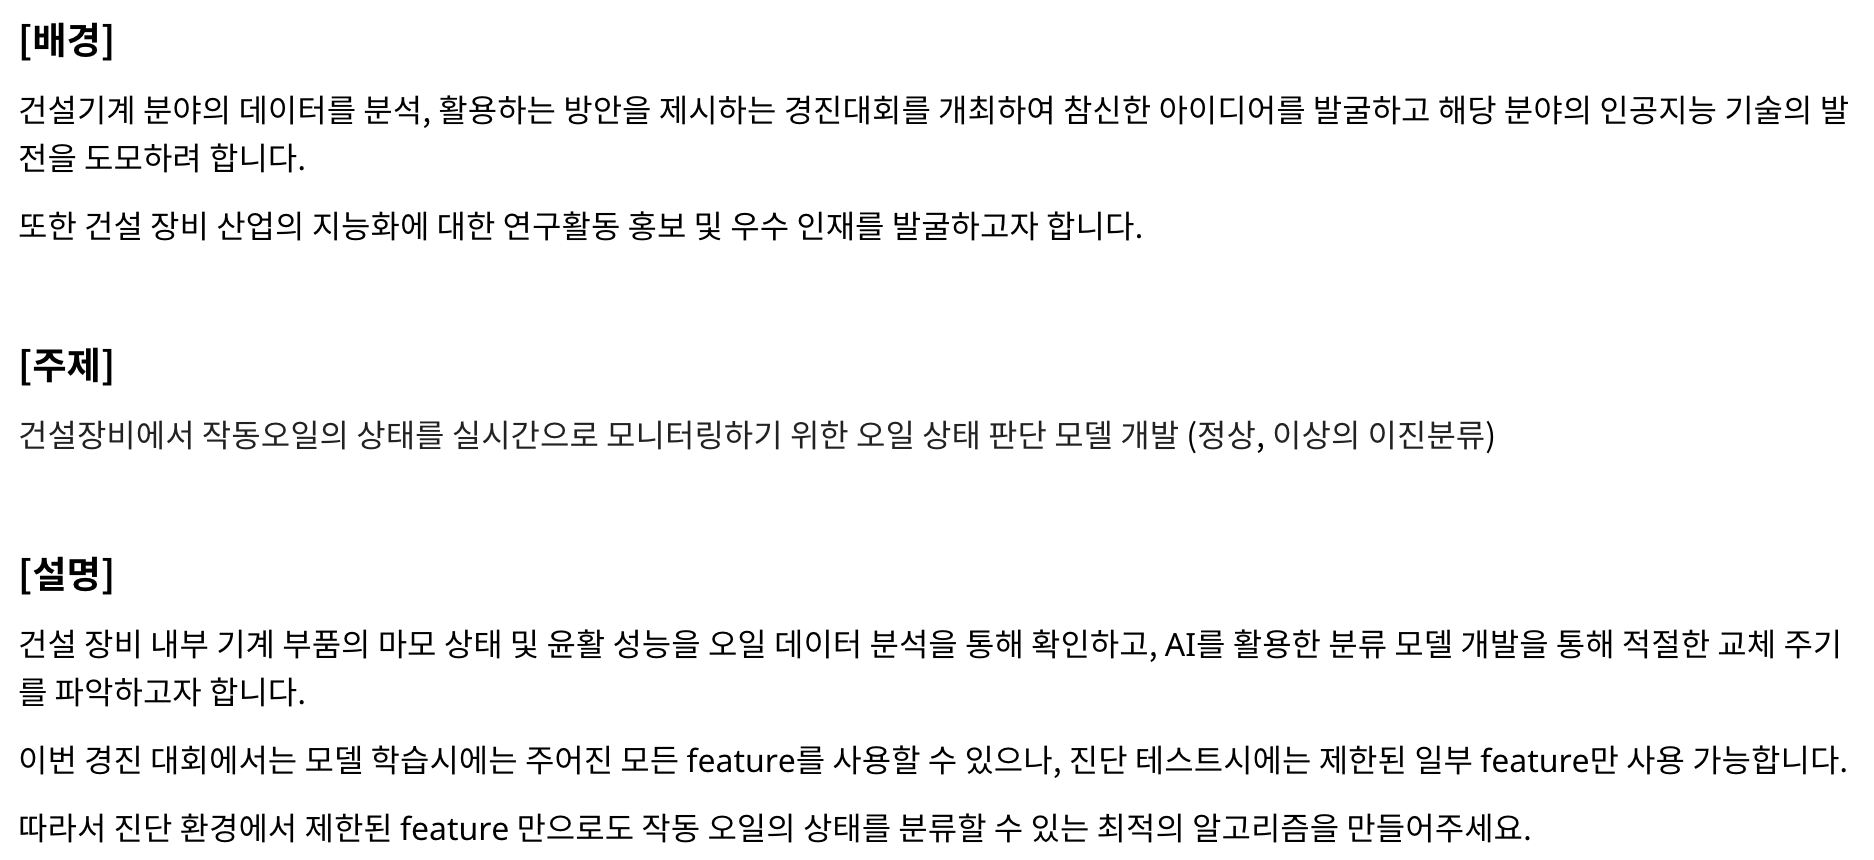

In [ ]:
Image(base_path+"data_pic.png", width="900", height="300")

#### 2) train columns != test columns

In [ ]:
train = pd.read_csv(base_path + "train.csv", encoding='cp949')
test = pd.read_csv(base_path + "test.csv", encoding='cp949')

print(train.columns.values)
print()
print(test.columns.values)

['ID' 'COMPONENT_ARBITRARY' 'ANONYMOUS_1' 'YEAR' 'SAMPLE_TRANSFER_DAY'
 'ANONYMOUS_2' 'AG' 'AL' 'B' 'BA' 'BE' 'CA' 'CD' 'CO' 'CR' 'CU' 'FH2O'
 'FNOX' 'FOPTIMETHGLY' 'FOXID' 'FSO4' 'FTBN' 'FE' 'FUEL' 'H2O' 'K' 'LI'
 'MG' 'MN' 'MO' 'NA' 'NI' 'P' 'PB' 'PQINDEX' 'S' 'SB' 'SI' 'SN'
 'SOOTPERCENTAGE' 'TI' 'U100' 'U75' 'U50' 'U25' 'U20' 'U14' 'U6' 'U4' 'V'
 'V100' 'V40' 'ZN' 'Y_LABEL']

['ID' 'COMPONENT_ARBITRARY' 'ANONYMOUS_1' 'YEAR' 'ANONYMOUS_2' 'AG' 'CO'
 'CR' 'CU' 'FE' 'H2O' 'MN' 'MO' 'NI' 'PQINDEX' 'TI' 'V' 'V40' 'ZN']


#### 3) data infos
    - null 값 존재 
    - 2개의 object features: "ID", "COMPONENT_ARBITRARY"

In [ ]:
train.isnull().any(axis=0).sum()

19

In [ ]:
train.dtypes == "object"

ID                      True
COMPONENT_ARBITRARY     True
ANONYMOUS_1            False
YEAR                   False
SAMPLE_TRANSFER_DAY    False
ANONYMOUS_2            False
AG                     False
AL                     False
B                      False
BA                     False
BE                     False
CA                     False
CD                     False
CO                     False
CR                     False
CU                     False
FH2O                   False
FNOX                   False
FOPTIMETHGLY           False
FOXID                  False
FSO4                   False
FTBN                   False
FE                     False
FUEL                   False
H2O                    False
K                      False
LI                     False
MG                     False
MN                     False
MO                     False
NA                     False
NI                     False
P                      False
PB                     False
PQINDEX       

In [ ]:
# https://docs.google.com/spreadsheets/d/1kI7zi_qXX1q_Yx0ENnNte57wYoaSdsWx/edit#gid=279701161
train.COMPONENT_ARBITRARY.unique()

array(['COMPONENT3', 'COMPONENT2', 'COMPONENT1', 'COMPONENT4'],
      dtype=object)

#### 결론: 
- 외부 정보 크롤링 불필요
- train, test columns 다른 문제에 대한 해결방안 
    - train data와 test data의 columns 같게 만들어주자.
    - test data columns을 독립변수, train data의 각 columns을 종속변수로 설정
    - 회귀분석 결과값이 가장 좋은 column들을 선별하고 이외의 column들은 삭제
- null 처리 방법: fillna(0), dropna()...
- catagorical feature인 " COMPONENT_ARBITRARY"를 기준으로 group을 만들어 EDA 진행

### 2. Model selection 
    - 회귀분석과 분류 모두 가능한 RF, XGB, LBGM 선택
    - metric
        - 분류: f1 score
        - 회귀: default= 'r2_score'

### 3. Insight from EDA 
    - Imblanace Problem 확인
    - Correlation 확인

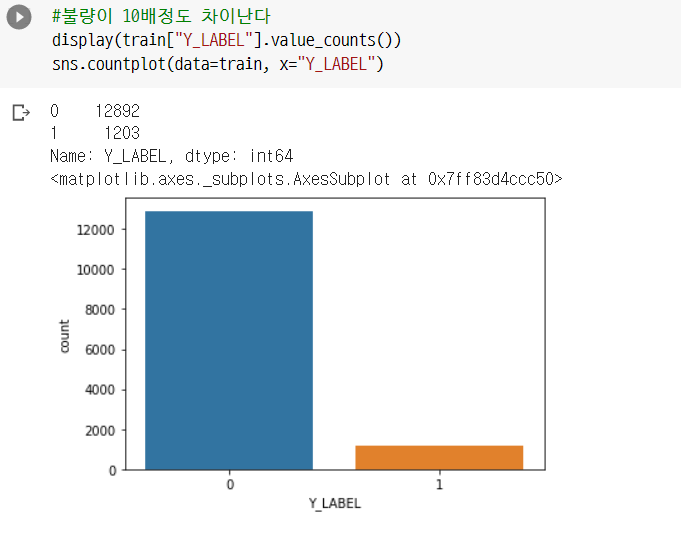

In [ ]:
# imbalance 확인
Image(base_path+"imbalance_pic.png", width="600", height="300")

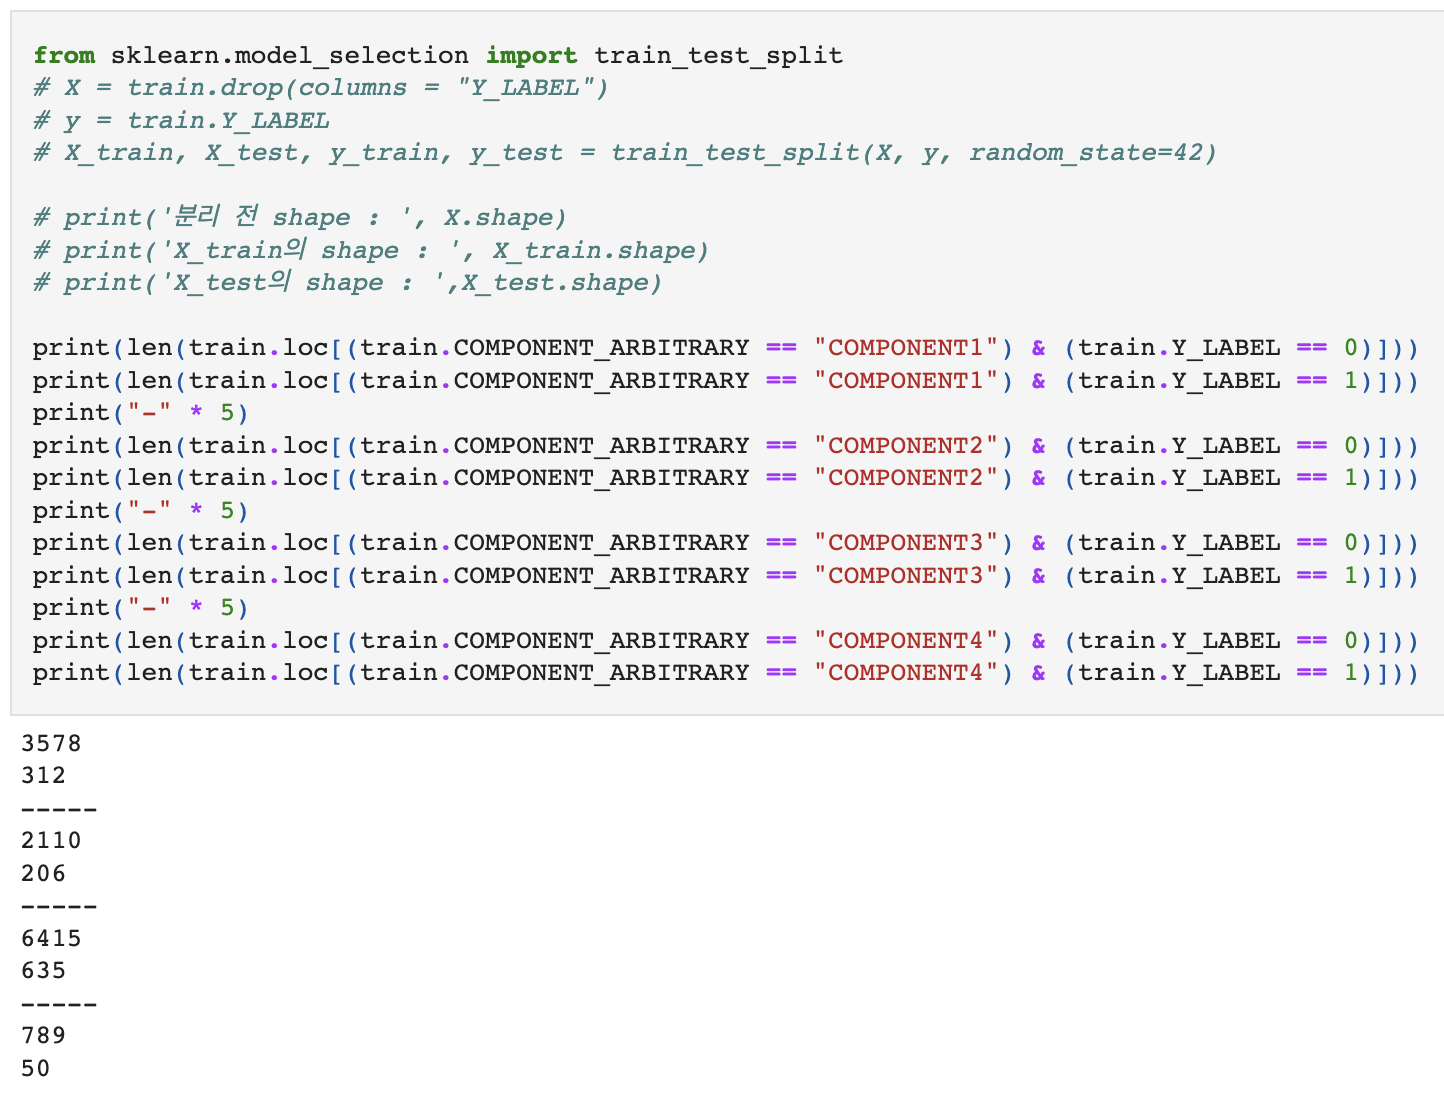

In [ ]:
# group별 imbalance 확인
Image(base_path+"group_pic.png", width="600", height="300")

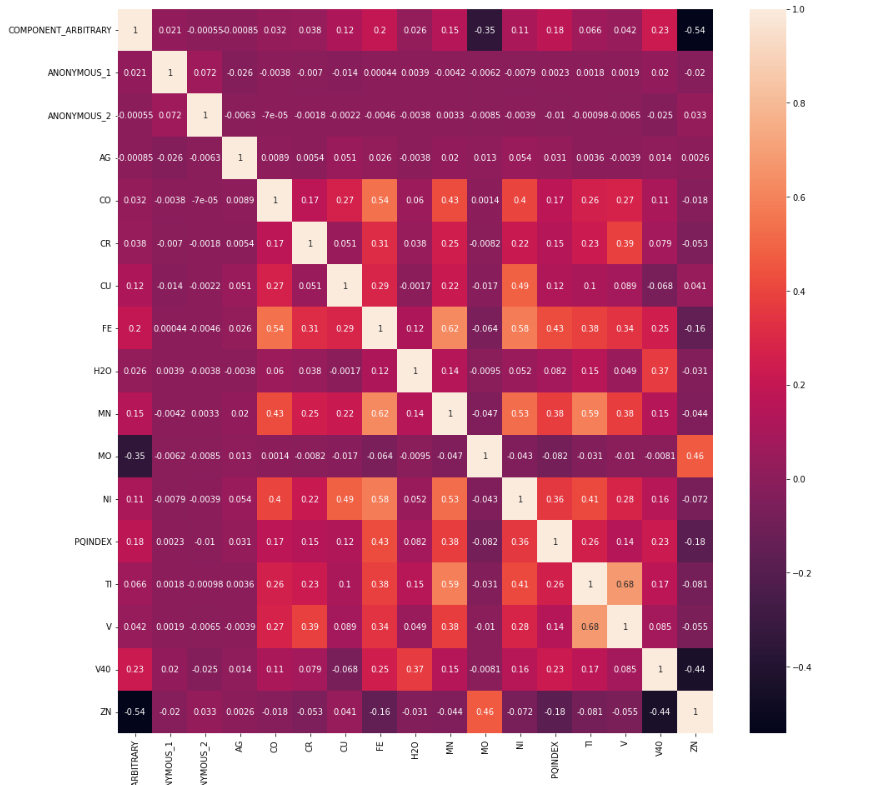

In [ ]:
Image(base_path+"corr.png", width="900", height="900")

#### 결론:
- imbalance 문제 해결을 위해 over, under, hybrid sampling 기법들 적용 필요
- 상관관계로 인한 다중공산성 발생하는지 확인 필요

### 4. Preprocessing 
    - Fill/Drop Null data
    - Standard Scaling
    - Ordinal Encoding

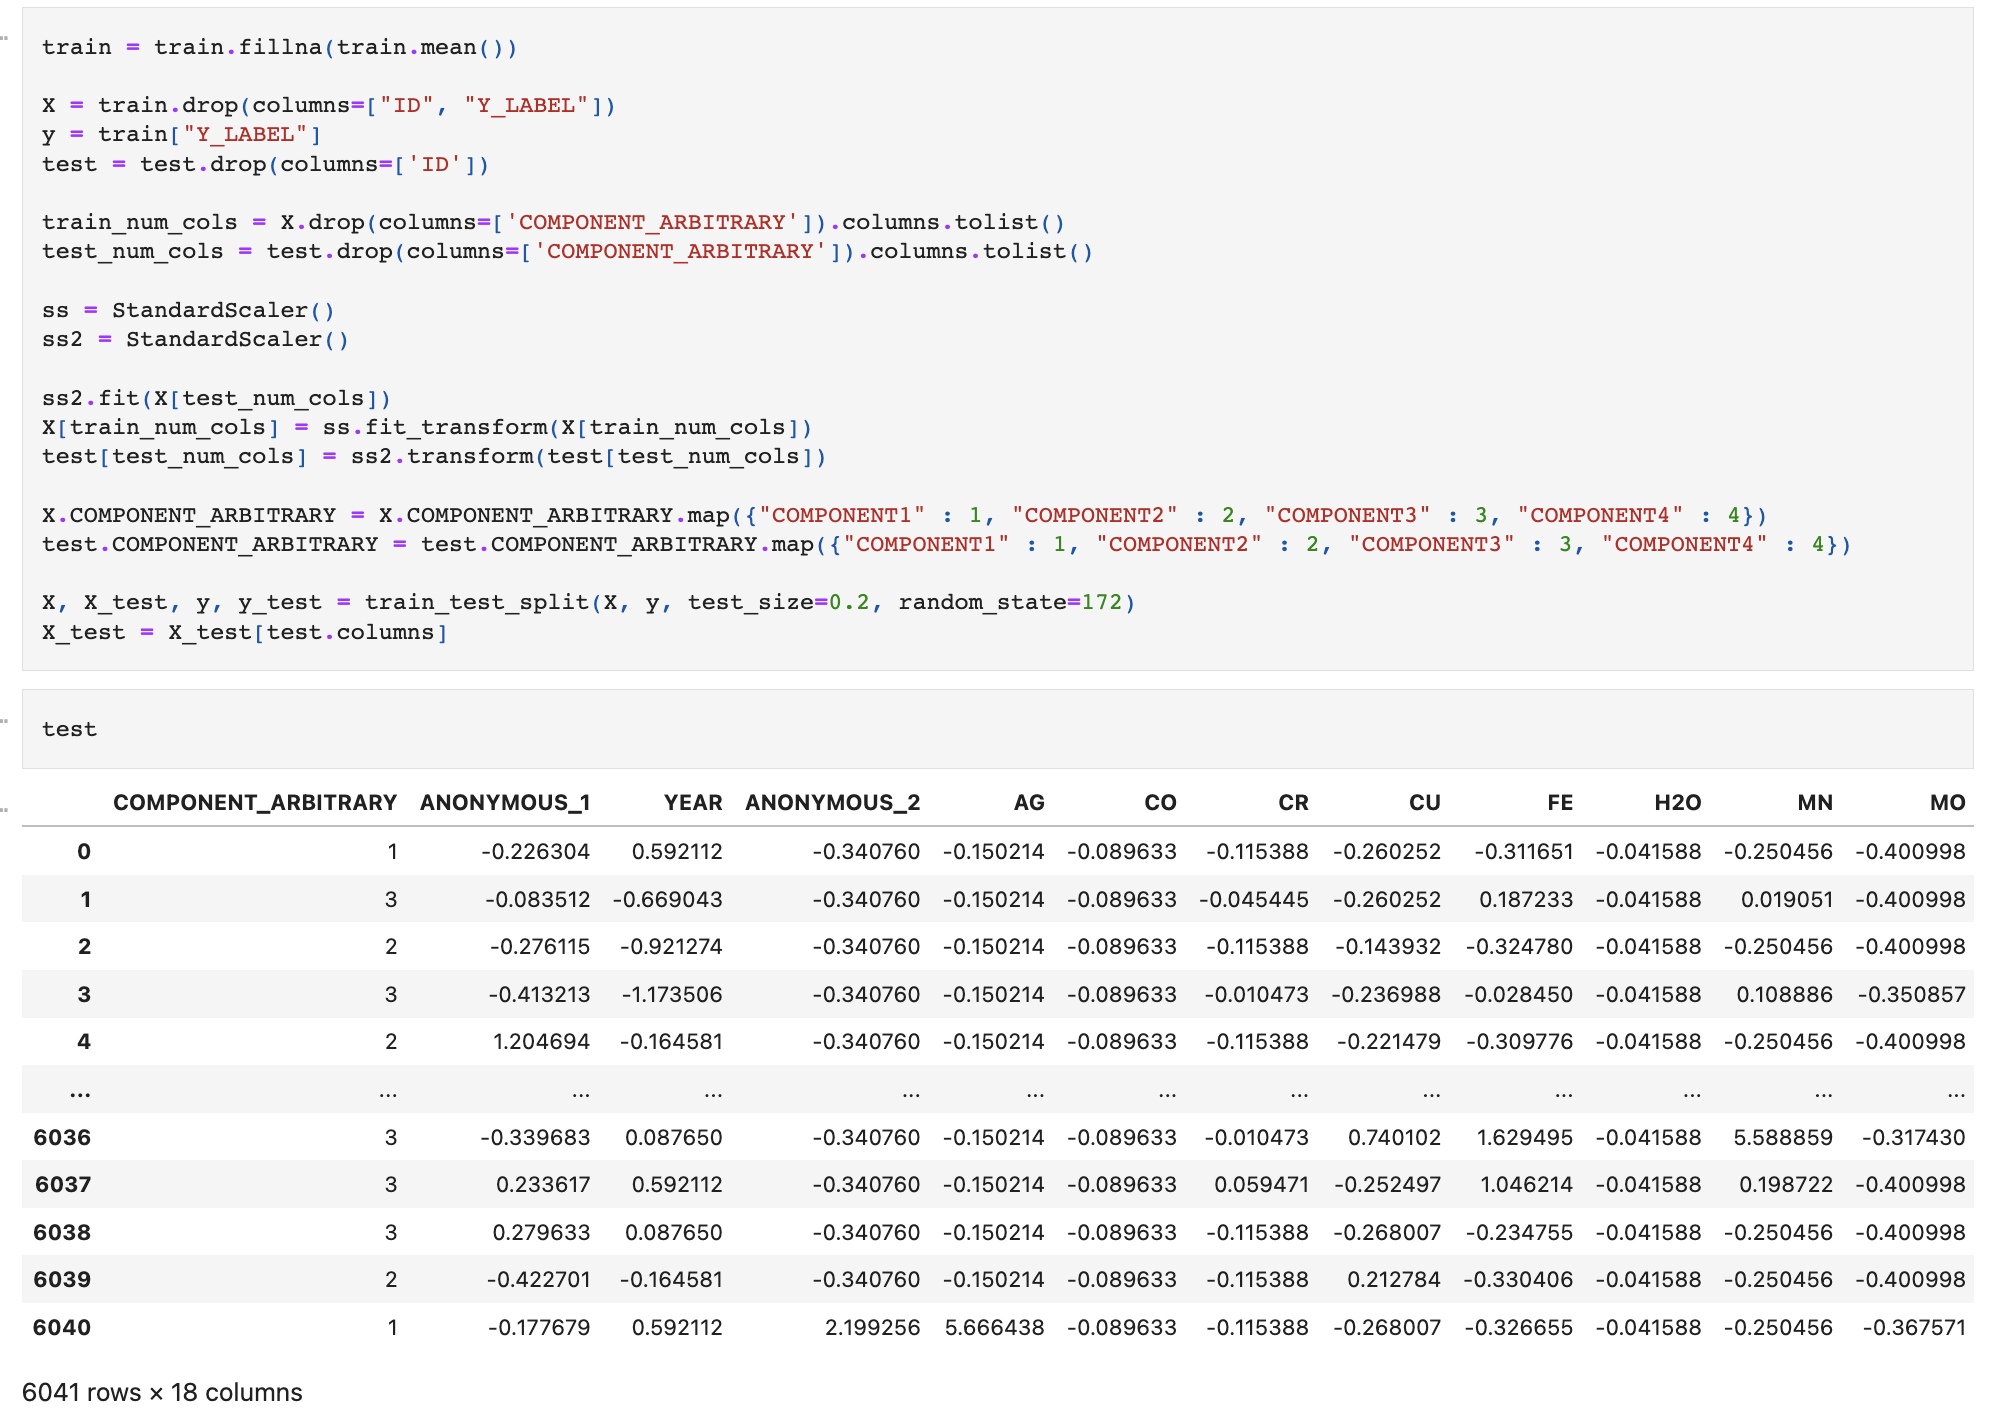

In [ ]:
Image(base_path+"preprocessing1.png", width="900", height="300")

### 5. Feature Engineering 
5.1) Test to Train 

    - 목젹: 
        - train data와 test data의 columns 같게 만들어주자.
        - test data columns을 독립변수, train data의 각 columns을 종속변수로 설정
        - 회귀분석 결과값이 가장 좋은 column들을 선별하고 이외의 column들은 삭제
        
    - 진행순서:
       - VIF(Variance Inflation Factor) to Check Multicollinearity
       - Regression Analaysis for New Features Creation

< Regressor 모델 설명 >

"metric": # 평가지표(default='r2_score')

"learner": # 학습모델['rf', 'xgb', 'lgbm'] 중 아무 조합 (default=['rf', 'xgb', 'lgbm'])

"ensemble": # ['voting', 'stacking'](default='voting')

"learning_rate": # 학습률(default=0.05)

"random_state": # 난수 seed(default=42)

"early_stopping_rounds": # overfitting 방지용(default=10)

"optimize": # optuna 사용할지 말지 결정(default=False)

"n_trials": # optuna 횟수(default=20)

"cv": # K-fold CV의 K(default=5)

"N": # voting에서 모델별 weights의 조합가지수(default=5)

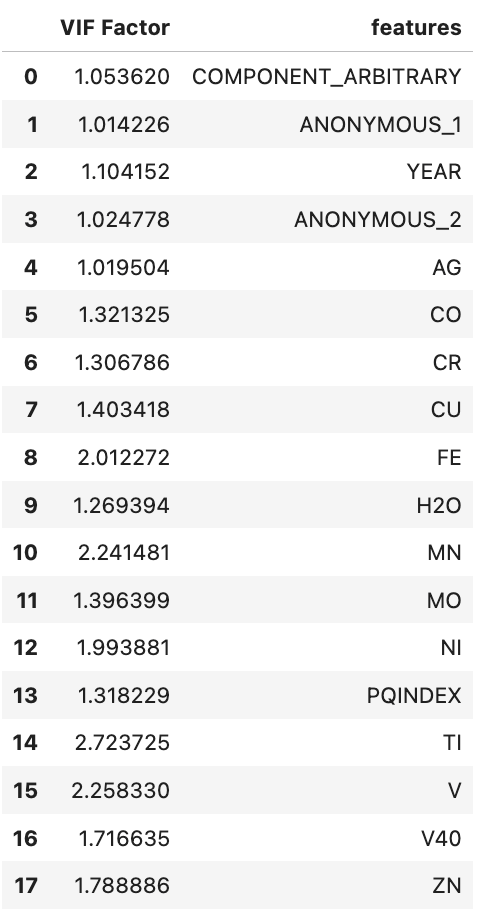

In [ ]:
Image(base_path+"VIF.png", width="300", height="300")

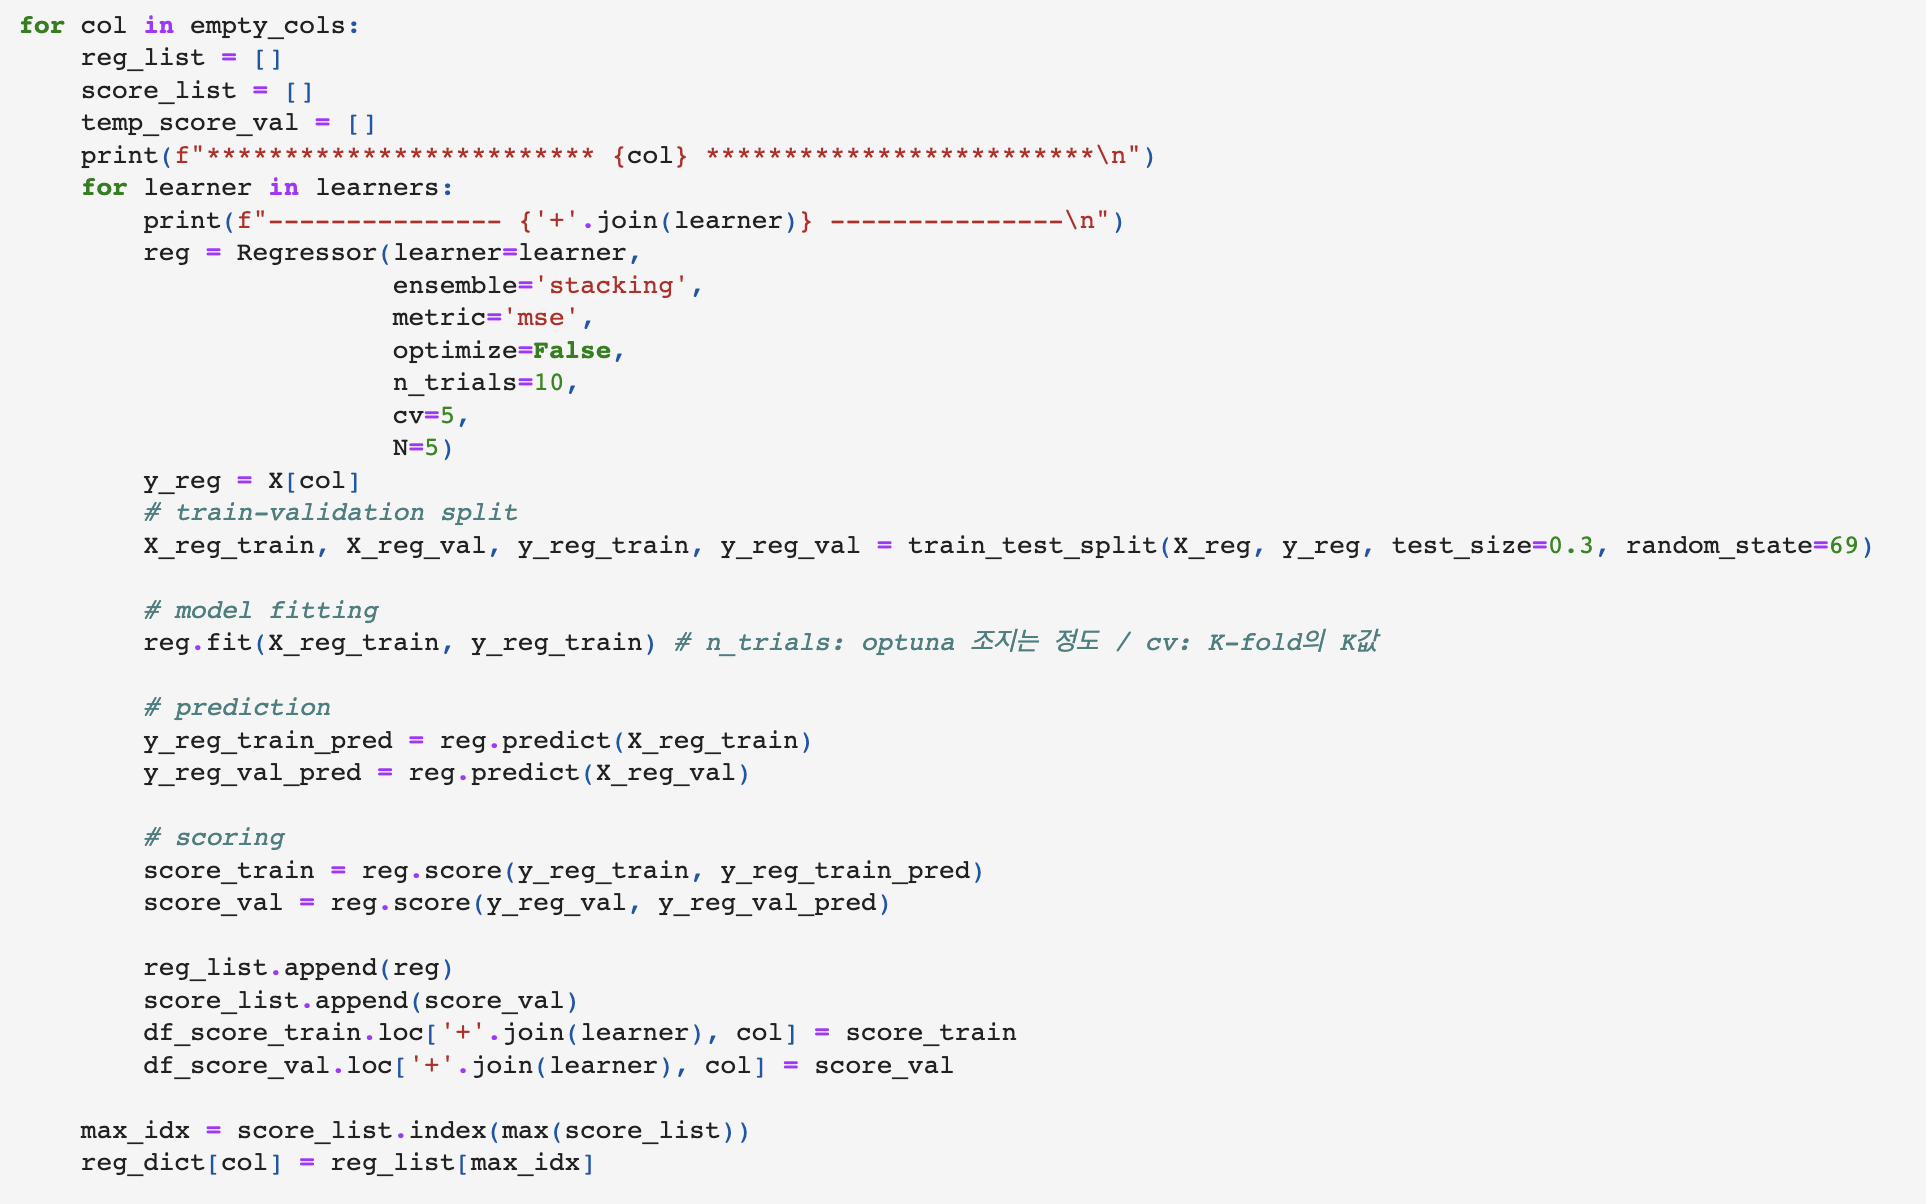

In [ ]:
Image(base_path+"reg_model.png", width="1000", height="300")

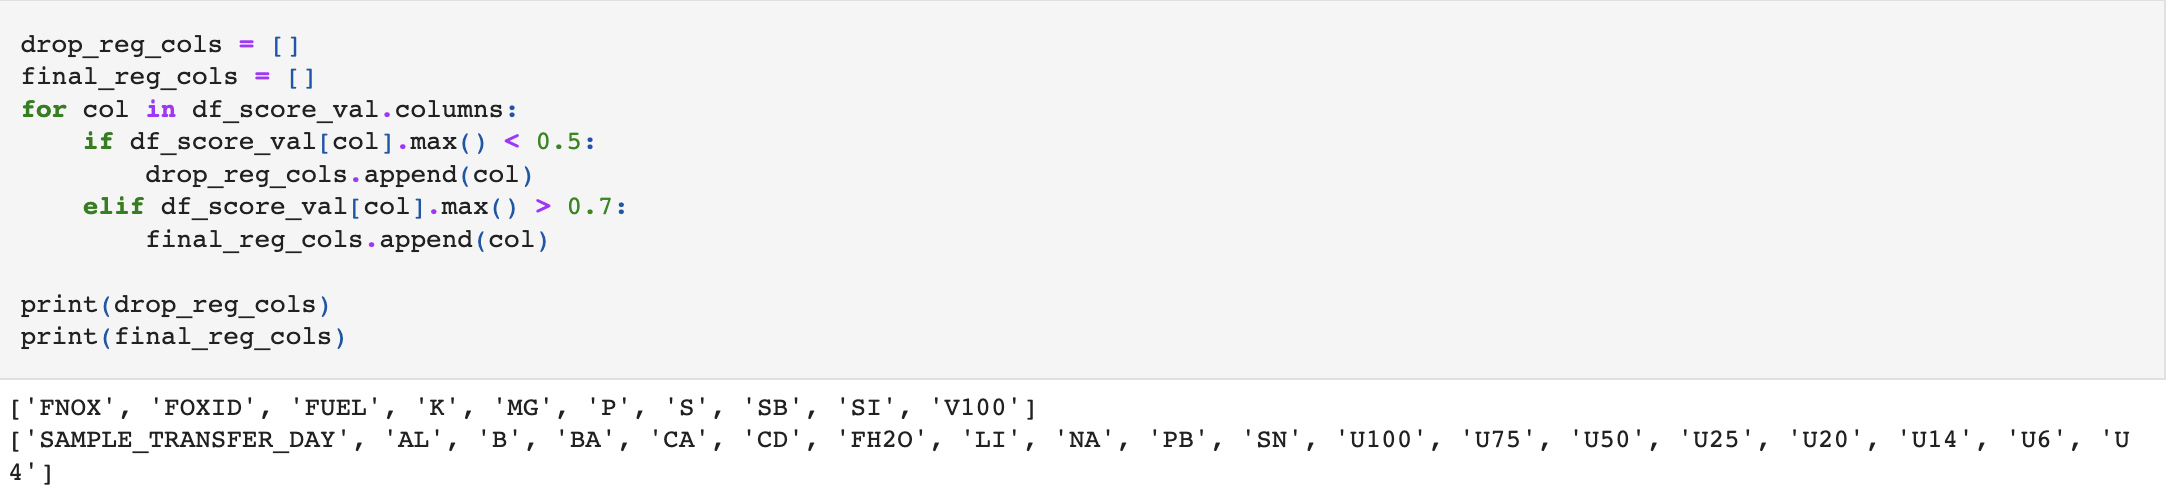

In [ ]:
Image(base_path+"reg_code.png", width="1000", height="300")

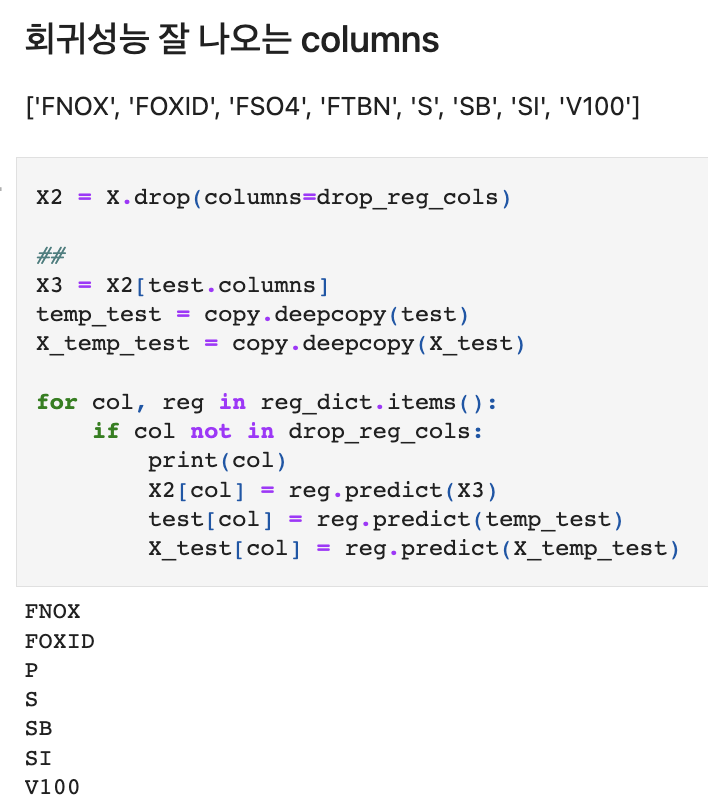

In [ ]:
Image(base_path+"Regression.png", width="500", height="300")

5.2) Train to Classification 

    - 목젹: 
        - 분류의 성능 향상을 위해 그룹을 나눈다.
        - imbalance 문제해결을 위해 sampling 진행
        - 차원축소를 위해 Feature Importance를 확인하고 중요도가 낮은 컬럼은 드랍한다. 
        
    - 진행순서:
        - Group
        - Sampling
        - Dimensionality(Feature Importance)

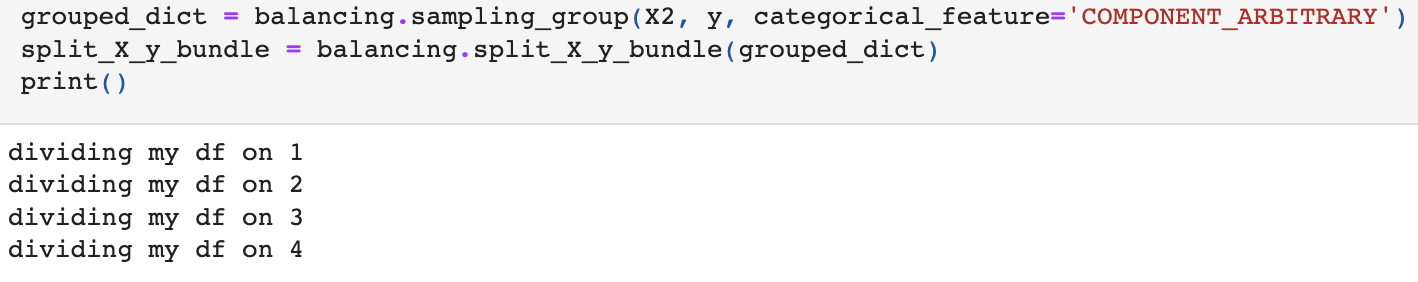

In [ ]:
Image(base_path+"group.png", width="900", height="300")

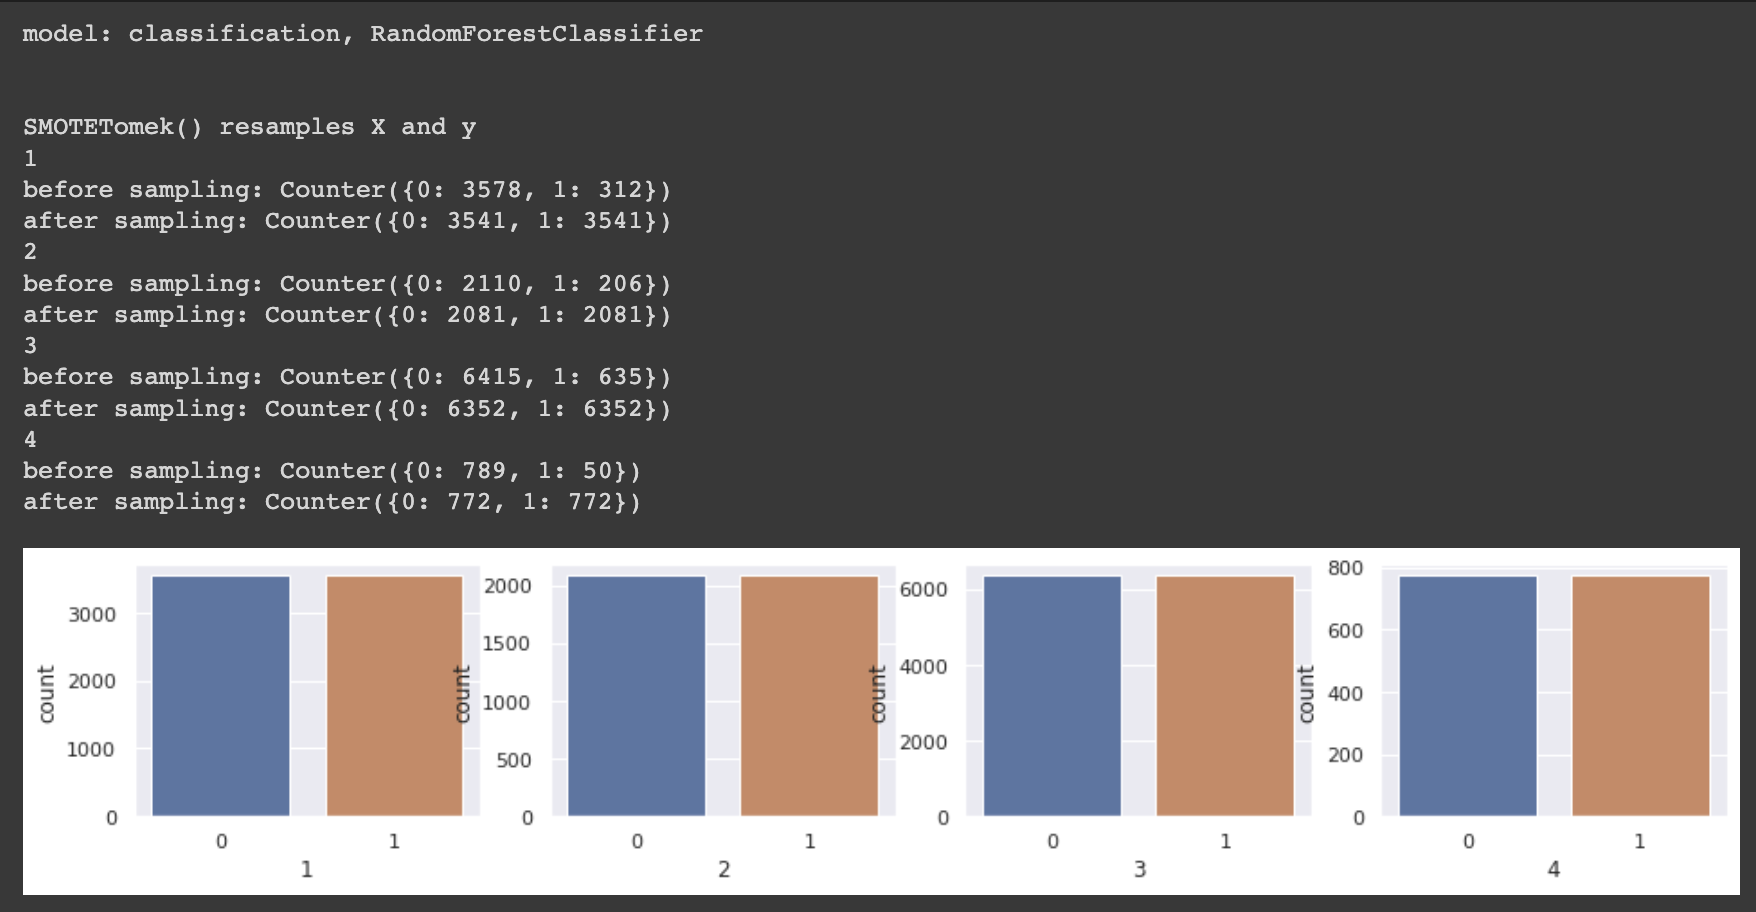

In [ ]:
Image(base_path+"sampling_result.png", width="900", height="300")

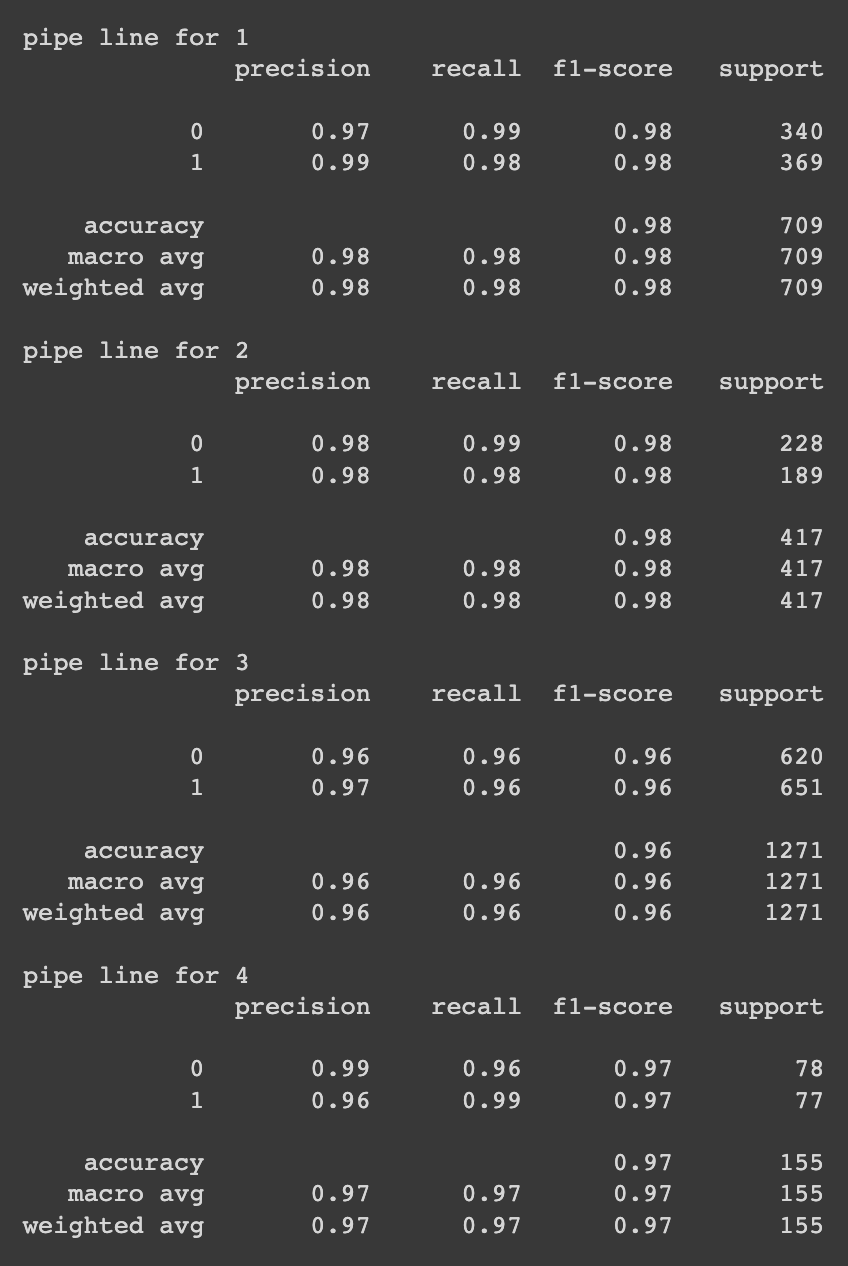

In [ ]:
Image(base_path+"pipe_line.png", width="500", height="300")

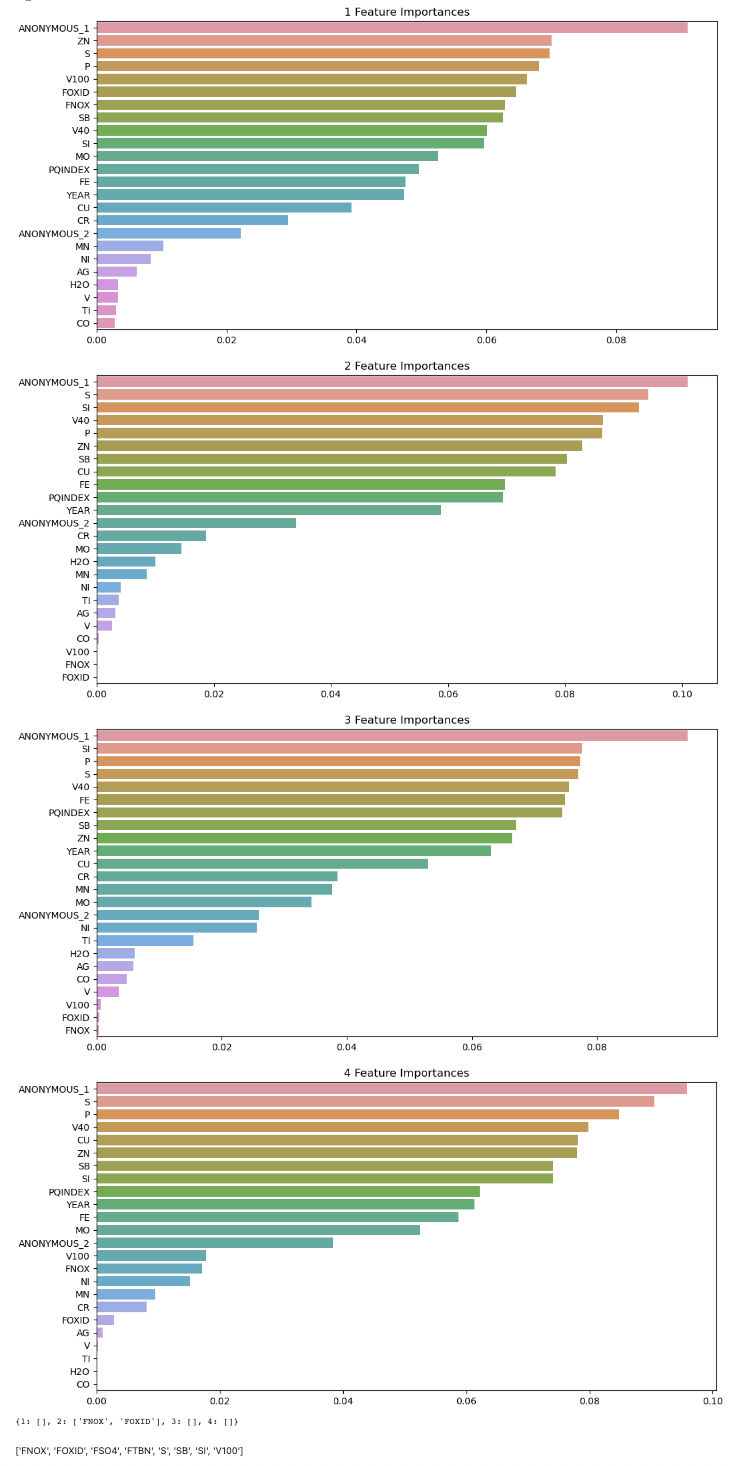

In [ ]:
Image(base_path+"FI.png", width="500", height="300")

### 6. Classification

"metric": # 평가지표(default='r2_score')

"learner": # 학습모델['rf', 'xgb', 'lgbm'] 중 아무 조합 선택 ㄱㄱ(default=['rf', 'xgb', 'lgbm'])

"ensemble": # ['voting', 'stacking'](default='voting')

"learning_rate": # 학습률(default=0.05)

"random_state": # 난수 seed(default=42)

"early_stopping_rounds": # overfitting 방지용(default=10)

"optimize": # optuna 사용할지 말지 True or False 사용 ㄱㄱ(default=False)

"n_trials": # optuna 횟수(default=20)

"cv": # K-fold CV의 K(default=5)

"N": # voting에서 모델별 weights의 조합가지수(default=5)

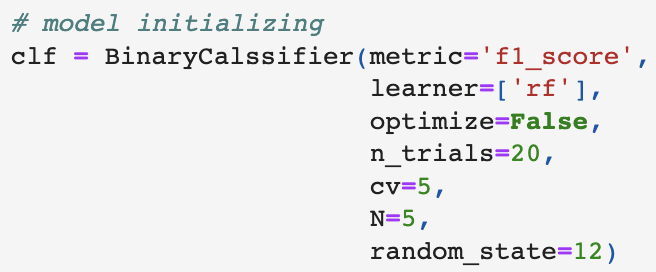

In [ ]:
Image(base_path+"classifier.png", width="500", height="300")

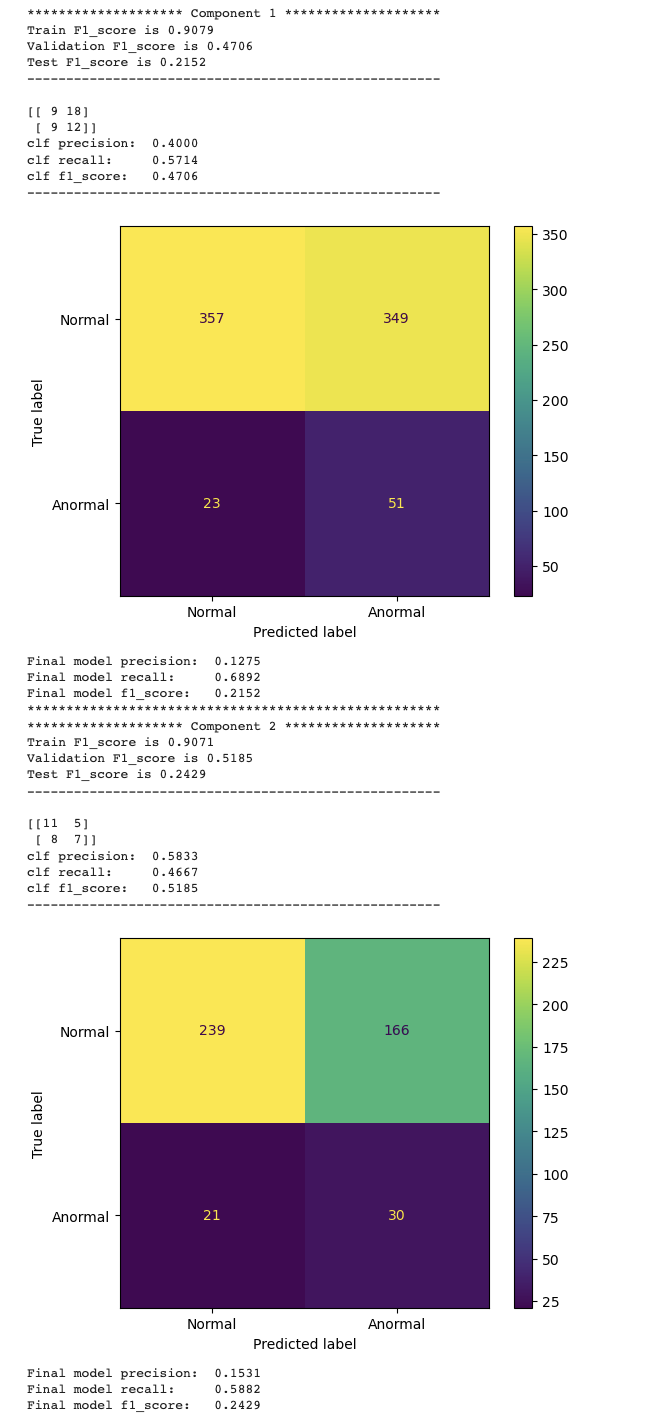

In [ ]:
Image(base_path+"confu.png", width="500", height="300")

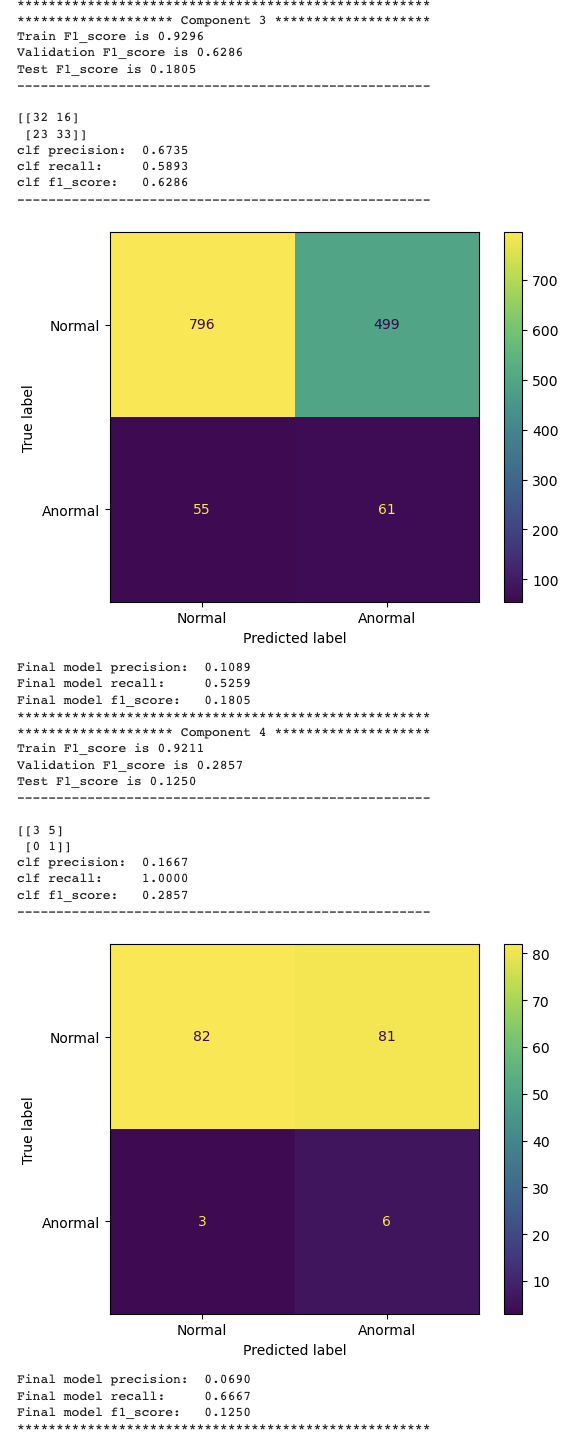

In [ ]:
Image(base_path+"confu2.png", width="500", height="300")

### 결론: 
    - train과 validation의 f1 score 비교 결과
        - 과적합 문제가 있음을 확인
    - validation과 test의 f1 score 또한 많은 차이를 보임
        - 하루 제출이 3번으로 제한되었기 때문에 자체적으로 test data를 만들어서 사용했다.
        - 이때, 대회의 test data와 최대한 같게 만들기 위해 sampling을 진행하지 않았다. 
        - 그 결과, sampling을 진행한 validation의 score와 test score의 차이가 발생.
        - sampling 이후 0과 1의 비율이 1:1로 맞춰짐에 따라 1의 숫자가 크게 늘어나 이와 같은 문제가 발행한 것이라 예상하고있다. 이에 추가 작업 계획
        

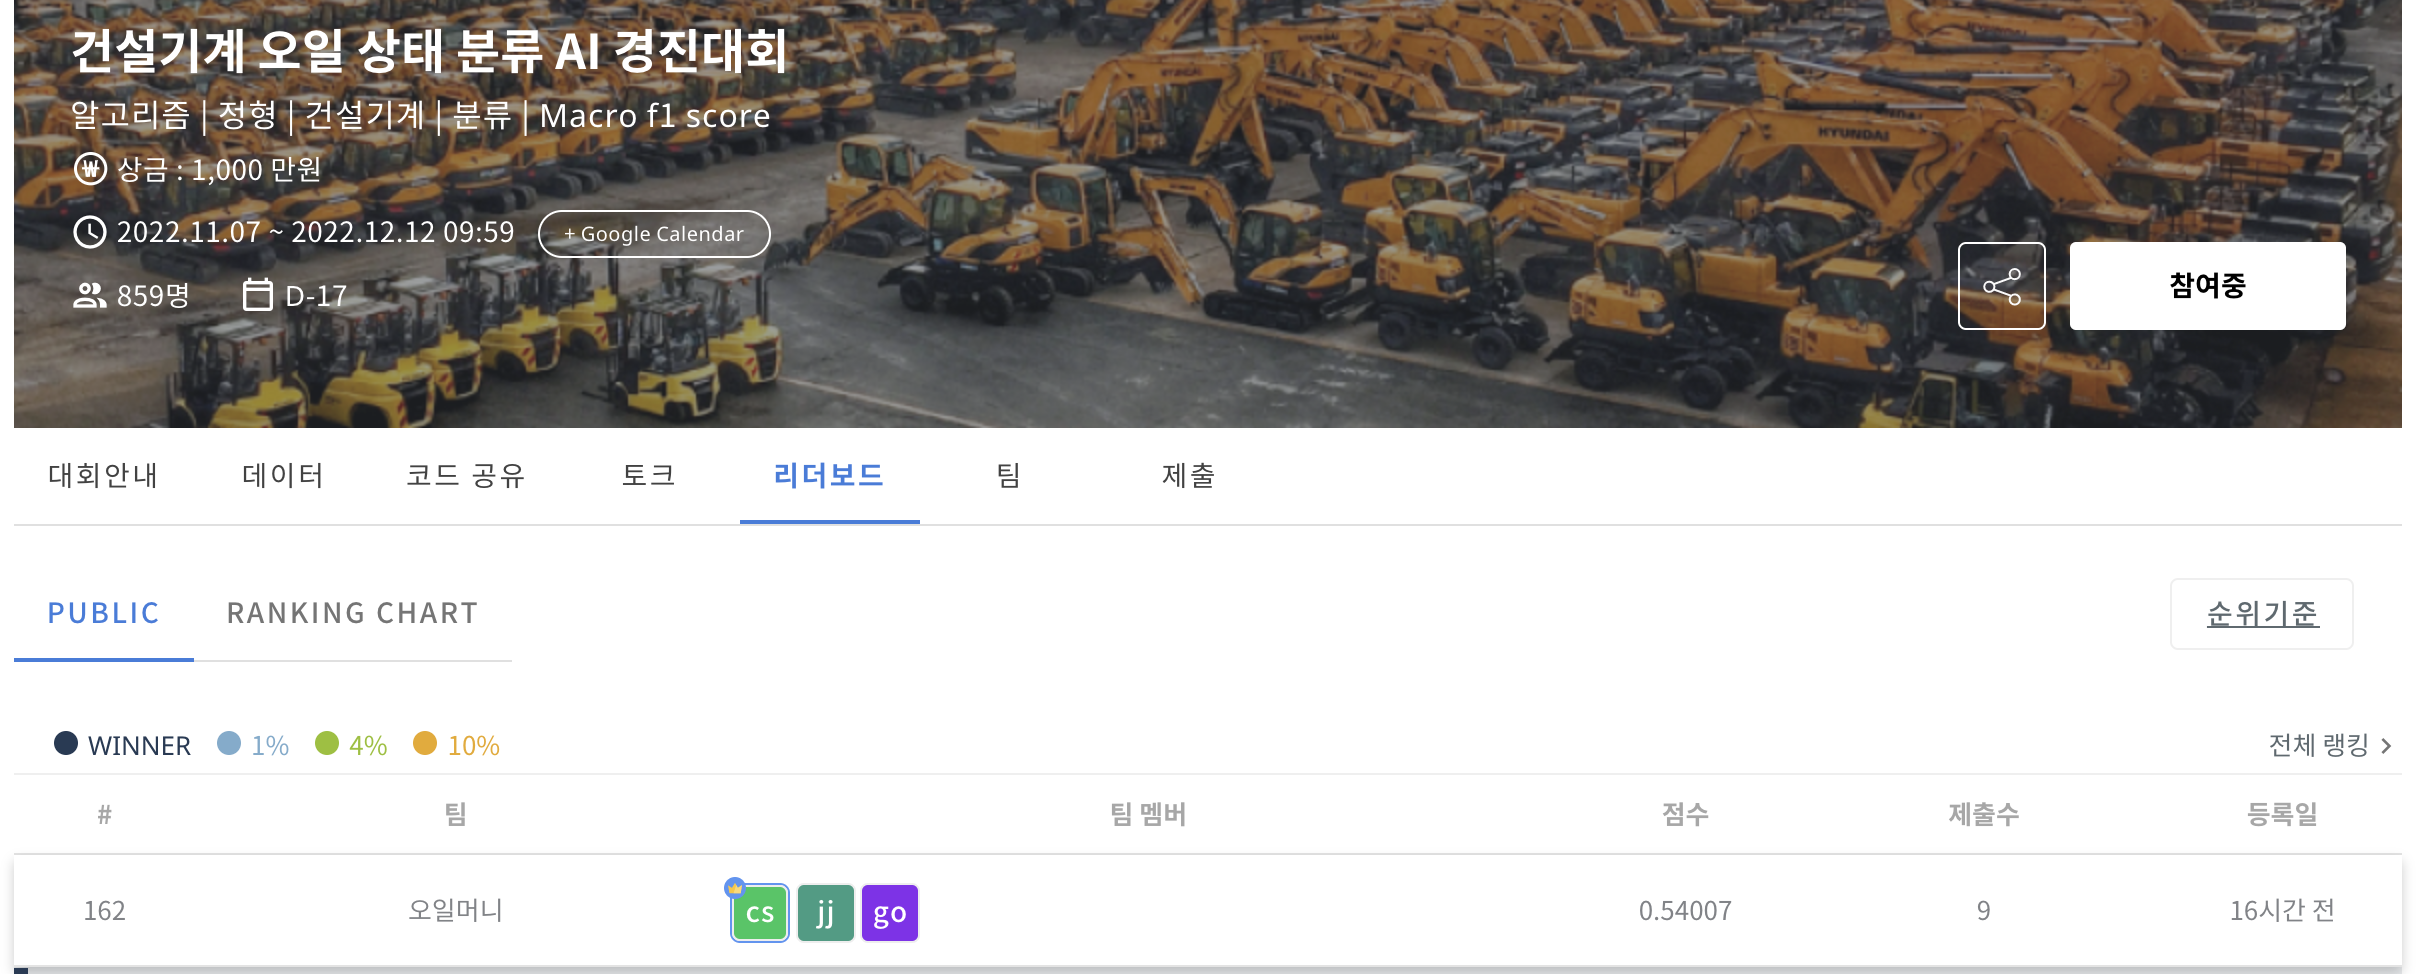

In [ ]:
Image(base_path+"leader.png", width="1000", height="300")

### 7. Deep Learning
### 본 대회의 취지따라 딥러닝까지 시도
- knowledge distillation(지식증류)의 대표 모델
- Teacher-Student Model


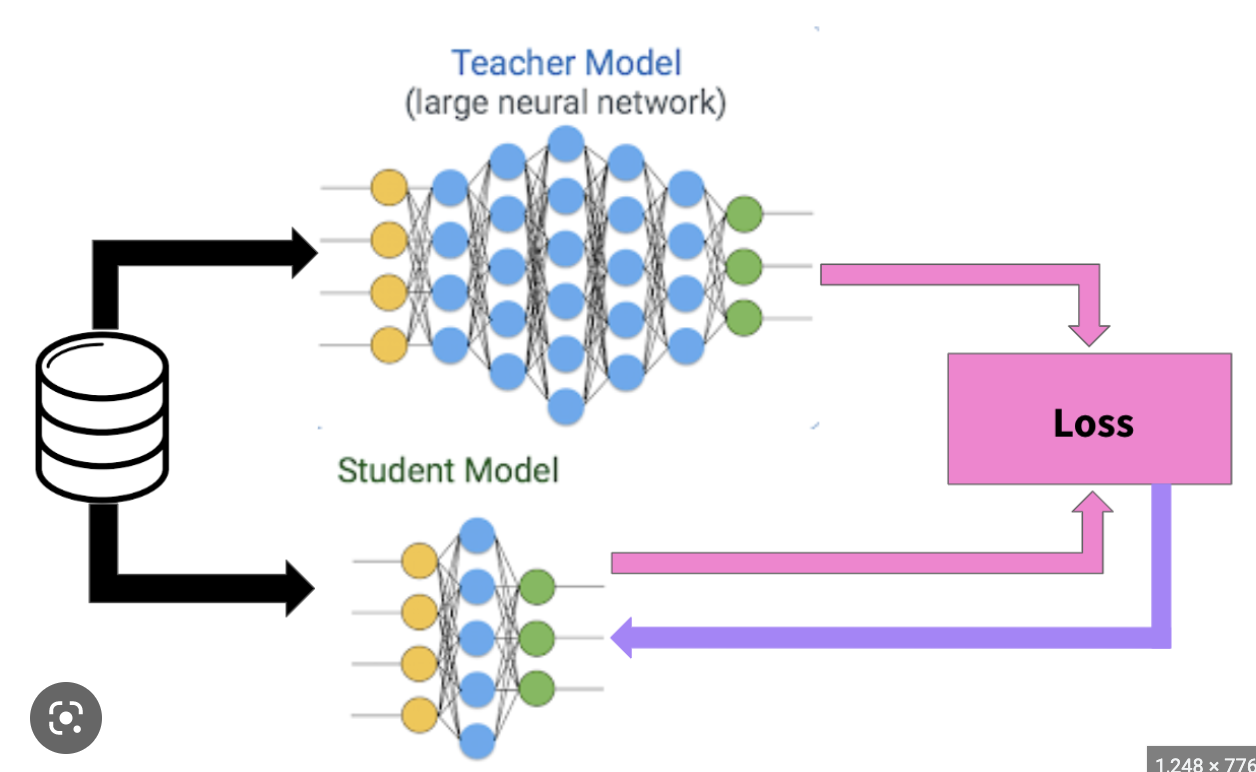

In [ ]:
Image(base_path+"deep.png", width="500", height="300")